### Advanced classification-Transfer Learning VGG 16 using Keras

In [3]:
import tensorflow as tf 

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [15]:
IMAGE_SIZE = [224, 224]
train_path = 'H:/Datasets/CNN BASED/kagglecatsanddogs_3367a/train'
valid_path = 'H:/Datasets/CNN BASED/kagglecatsanddogs_3367a/test'

In [16]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [17]:
for layer in vgg16.layers:
    layer.trainable = False

In [18]:
folders = glob('H:/Datasets/CNN BASED/kagglecatsanddogs_3367a/train/*')

In [19]:
x = Flatten()(vgg16.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)

In [21]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [22]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
training_set = train_datagen.flow_from_directory('H:/Datasets/CNN BASED/kagglecatsanddogs_3367a/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2448 images belonging to 2 classes.


In [28]:
test_set = test_datagen.flow_from_directory('H:/Datasets/CNN BASED/kagglecatsanddogs_3367a/test',
                                            target_size = (224, 224),
                                            batch_size = 30,
                                            class_mode = 'categorical')

Found 442 images belonging to 2 classes.


In [29]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\VISERION\.conda\envs\standard\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
77/77 [==============================] - ETA: 0s - loss: 0.3908 - accuracy: 0.8350WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000018E42E60D90> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

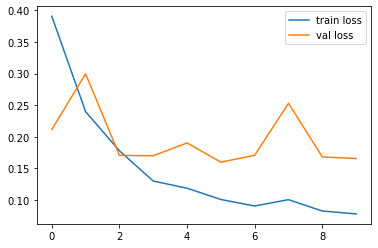

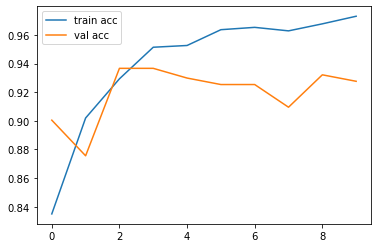

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
from tensorflow.keras.models import load_model

model.save('catsdogs_vgg16.h5')

In [32]:

y_pred = model.predict(test_set)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [33]:
y_pred

array([[5.97763240e-01, 4.02236760e-01],
       [7.15080053e-02, 9.28492010e-01],
       [5.68949967e-04, 9.99431074e-01],
       [1.87767118e-01, 8.12232912e-01],
       [9.99574363e-01, 4.25636012e-04],
       [8.11671197e-01, 1.88328788e-01],
       [2.22983072e-05, 9.99977708e-01],
       [1.00605735e-04, 9.99899387e-01],
       [3.27358842e-01, 6.72641158e-01],
       [9.99857068e-01, 1.42855410e-04],
       [8.87582600e-01, 1.12417430e-01],
       [9.83261645e-01, 1.67383775e-02],
       [5.73965553e-06, 9.99994278e-01],
       [9.99994755e-01, 5.26671465e-06],
       [9.99889255e-01, 1.10783985e-04],
       [1.30694048e-07, 9.99999881e-01],
       [9.99969006e-01, 3.09406241e-05],
       [9.11921915e-03, 9.90880728e-01],
       [9.27766621e-01, 7.22333118e-02],
       [9.90943611e-01, 9.05642845e-03],
       [6.12497590e-02, 9.38750207e-01],
       [9.97684598e-01, 2.31534080e-03],
       [9.57036734e-01, 4.29632328e-02],
       [1.00000000e+00, 2.40734508e-08],
       [5.536979

In [36]:
import numpy as np
y_pred = np.argmax(y_pred,axis=0)

In [37]:
y_pred

1